<a href="https://colab.research.google.com/github/2303A51717/2303A51717_b11_pds/blob/main/lab_2(b11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

question-1

Monthly Temperatures (°C): [15.2 17.5 21.3 26.4 30.1 33.5 32.8 31.7 29.2 24.5 19.3 16.1]
Average Temperature (°C): 24.8
Hottest Month: Jun ( 33.5 °C )
Coldest Month: Jan ( 15.2 °C )
Normalized Temperatures: [0.   0.13 0.33 0.61 0.81 1.   0.96 0.9  0.77 0.51 0.22 0.05]
Months above annual average: ['Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep']
Temperatures in Fahrenheit: [59.36 63.5  70.34 79.52 86.18 92.3  91.04 89.06 84.56 76.1  66.74 60.98]


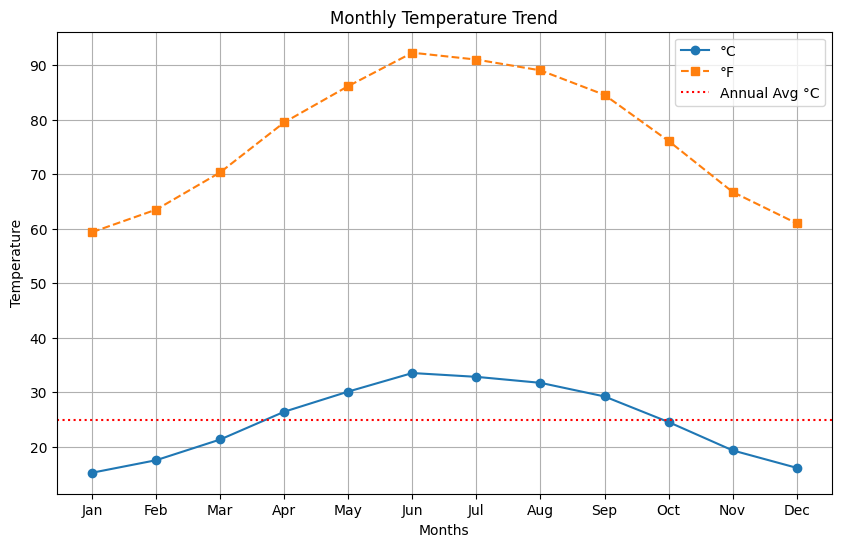

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a NumPy array for 12 monthly temperature values (Celsius)
# Example dataset (Jan to Dec temperatures in °C)
temps_celsius = np.array([15.2, 17.5, 21.3, 26.4, 30.1, 33.5, 32.8, 31.7, 29.2, 24.5, 19.3, 16.1])

months = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# 2. Find average temperature, hottest and coldest months
avg_temp = np.mean(temps_celsius)
hottest_month = months[np.argmax(temps_celsius)]
coldest_month = months[np.argmin(temps_celsius)]

# 3. Normalize the temperature values (min-max normalization)
norm_temps = (temps_celsius - temps_celsius.min()) / (temps_celsius.max() - temps_celsius.min())

# 4. Identify months above annual average
above_avg_months = months[temps_celsius > avg_temp]

# 5. Convert Celsius to Fahrenheit using vectorized operations
temps_fahrenheit = (temps_celsius * 9/5) + 32

# 6. Print Outputs
print("Monthly Temperatures (°C):", temps_celsius)
print("Average Temperature (°C):", round(avg_temp, 2))
print("Hottest Month:", hottest_month, "(", temps_celsius.max(), "°C )")
print("Coldest Month:", coldest_month, "(", temps_celsius.min(), "°C )")
print("Normalized Temperatures:", np.round(norm_temps, 2))
print("Months above annual average:", above_avg_months)
print("Temperatures in Fahrenheit:", np.round(temps_fahrenheit, 2))

# 7. Visualization (optional)
plt.figure(figsize=(10,6))
plt.plot(months, temps_celsius, marker='o', linestyle='-', label="°C")
plt.plot(months, temps_fahrenheit, marker='s', linestyle='--', label="°F")
plt.axhline(avg_temp, color='r', linestyle=':', label="Annual Avg °C")
plt.title("Monthly Temperature Trend")
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
question--2


In [2]:
import pandas as pd

# 1. Create a pandas DataFrame with sample data
data = {
    "Order_ID": [101, 102, 103, 104, 105, 106],
    "Product": ["Laptop", "Phone", "Tablet", "Headphones", "Laptop", "Phone"],
    "Quantity": [2, 5, 3, 10, 1, 8],
    "Price": [60000, 15000, 20000, 2000, 60000, 15000]
}

df = pd.DataFrame(data)

# 2. Calculate Total Sale per order (Quantity × Price)
df["Total_Sale"] = df["Quantity"] * df["Price"]

# 3. Filter orders where total sale > 1000
high_value_orders = df[df["Total_Sale"] > 1000]

# 4. Find most sold product using groupby (by Quantity)
most_sold = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(1)

# 5. Add a Discount column based on sale amount
# Example: >50k → 10% discount, >20k → 5%, else 0%
def discount_rule(sale):
    if sale > 50000:
        return sale * 0.10
    elif sale > 20000:
        return sale * 0.05
    else:
        return 0

df["Discount"] = df["Total_Sale"].apply(discount_rule)

# 6. Export the summary to Excel
df.to_excel("sales_summary.xlsx", index=False)

# 7. Print Outputs
print("Full DataFrame:\n", df, "\n")
print("High Value Orders (Total_Sale > 1000):\n", high_value_orders, "\n")
print("Most Sold Product:\n", most_sold, "\n")
print("Excel file 'sales_summary.xlsx' has been created successfully!")


Full DataFrame:
    Order_ID     Product  Quantity  Price  Total_Sale  Discount
0       101      Laptop         2  60000      120000   12000.0
1       102       Phone         5  15000       75000    7500.0
2       103      Tablet         3  20000       60000    6000.0
3       104  Headphones        10   2000       20000       0.0
4       105      Laptop         1  60000       60000    6000.0
5       106       Phone         8  15000      120000   12000.0 

High Value Orders (Total_Sale > 1000):
    Order_ID     Product  Quantity  Price  Total_Sale
0       101      Laptop         2  60000      120000
1       102       Phone         5  15000       75000
2       103      Tablet         3  20000       60000
3       104  Headphones        10   2000       20000
4       105      Laptop         1  60000       60000
5       106       Phone         8  15000      120000 

Most Sold Product:
 Product
Phone    13
Name: Quantity, dtype: int64 

Excel file 'sales_summary.xlsx' has been created success